# 🛠️ ToolFormer (Pytorch)

> Implementation of Toolformer

[<img src="https://img.shields.io/badge/license-MIT-blue">](https://github.com/xrsrke/toolformer)
[![tests](https://github.com/vwxyzjn/cleanrl/actions/workflows/tests.yaml/badge.svg)](https://github.com/xrsrke/toolformer)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1zKscWqwnXrpSllY-dZKR4ZsMfSbPsl-s?usp=sharing)

<!-- [![Imports: isort](https://img.shields.io/badge/%20imports-isort-%231674b1?style=flat&labelColor=ef8336)](https://pycqa.github.io/isort/) -->
<!-- [![Code style: black](https://img.shields.io/badge/code%20style-black-000000.svg)](https://github.com/psf/black)
[![docs](https://img.shields.io/github/deployments/vwxyzjn/cleanrl/Production?label=docs&logo=vercel)](https://xrsrke.github.io/instructGOOSE/) -->


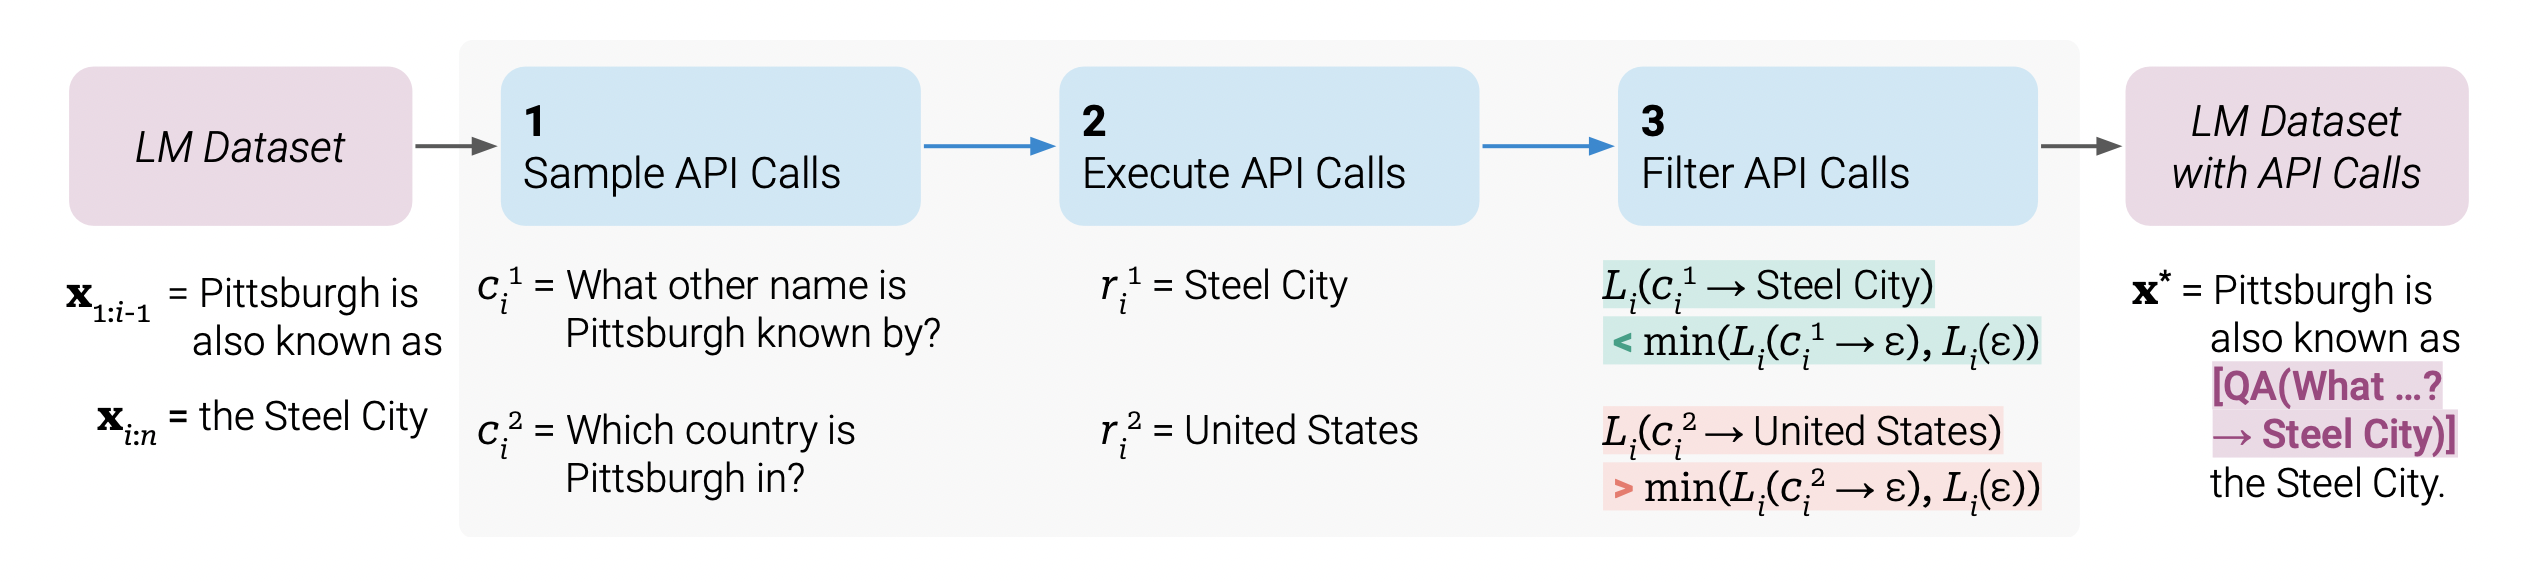

Paper: [Toolformer: Language Models Can Teach Themselves to Use Tools](https://arxiv.org/abs/2302.04761)

**I'm implementing ToolFormer on stream. Wanna watch it in action? Go: [twitch.tv/xrsrke](https://twitch.tv/xrsrke)**

### TODO

- ✅ Augment data with batch size 1 :)
- [ ] Support agument a batch of text
- [ ] Execute API calls in parallel
- ✅ Inference with batch size 1 :)
- [ ] Inference with batch size more than 1 :)
- [ ] Support Data Generation to GPU
- [ ] Add 🤗 Accelerate


**API**

- ✅ Support add custom API
- ✅ Calculator API
- ✅ WolframeAlpha API

### Install

Install from PipPy
``` sh
pip install toolformer
```

Install directly from the source code

``` sh
git clone https://github.com/xrsrke/toolformer.git
cd toolformer
pip install -e .
```

### 🤖  Data Generation

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

from toolformer.data_generator import DataGenerator
from toolformer.api import CalculatorAPI
from toolformer.prompt import calculator_prompt
from toolformer.utils import yaml2dict

In [ ]:
config = yaml2dict('../configs/default.yaml')
calculator_api = CalculatorAPI(
    "Calculator", calculator_prompt,
    sampling_threshold=0.2, filtering_threshold=0.2
)

model = AutoModelForCausalLM.from_pretrained("bigscience/bloom-560m")
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloom-560m")

In [ ]:
text = "From this, we have 10 - 5 minutes = 5 minutes."
apis = [calculator_api]
generator = DataGenerator(config, model, tokenizer, apis=apis)

In [ ]:
augumented_text_ids = generator.generate(text)

In [ ]:
print(tokenizer.decode(augumented_text_ids[0][0], skip_special_tokens=True))

From this, we have 10 - 5 minutes = [Calculator(10 - 5)] 5 minutes.




In [ ]:
#| hide
assert augumented_text_ids.shape[0] == 1
assert augumented_text_ids.ndim == 3

### Add a Custom API?

First, you need to add a new API.

```python
from toolformer.api import BaseAPI

class WikiSearchAPI(BaseAPI):
    def execute(self, text):
        # your custom api endpoint or whatever
        output = YourCustomAPIEndPoint(text)
        return output
```

Then, create a new prompt template following the form. That's all!

In [ ]:
from toolformer.prompt import calculator_prompt
print(calculator_prompt)


Your task is to add calls to a Calculator API to a piece of text. The API call should help you get information required to complete the text. 

You can call the API by writing "Calculator(operation)!" where "operation" is the type of calculation you want to perform. Here are some examples of API calls:

Input: John has 5 apples and his friend gave him 3 more. John now has 8 apples.
Ouput: John has 5 apples and his friend gave him 3 more. John now has [Calculator("5 + 3")] 8 apples.

Input: Jane needs to divide 24 pieces of candy equally among 6 kids. Each kid will get 4 pieces of candy.
Output: Jane needs to divide 24 pieces of candy equally among 6 kids. Each kid will get [Calculator(24 / 6)] 4 pieces of candy.

Input: From this, we have 4 * 30 minutes = 120 minutes.
Output: From this, we have 4 * 30 minutes = [Calculator(4 * 30)] 120 minutes.

Input: {input}
Output:



### Resources
Here're resources that i used to implement this

- How to sampling APIs call: https://www.youtube.com/live/RLcr4bqGsEQ
- How to calculate the loss: https://youtu.be/lQI9S5ngfHQ

### Citations

```bibtex
@inproceedings{Schick2023ToolformerLM,
    title   = {Toolformer: Language Models Can Teach Themselves to Use Tools},
    author  = {Timo Schick and Jane Dwivedi-Yu and Roberto Dessi and Roberta Raileanu and Maria Lomeli and Luke Zettlemoyer and Nicola Cancedda and Thomas Scialom},
    year    = {2023}
}
```

```bibtex
@misc{https://doi.org/10.48550/arxiv.2211.05100,
  title = {BLOOM: A 176B-Parameter Open-Access Multilingual Language Model},  
  author = {Workshop, BigScience and {:} and Scao, Teven Le and Fan, Angela and Akiki, Christopher and Pavlick, Ellie and Ilić, Suzana and Hesslow, Daniel and Castagné, Roman and Luccioni, Alexandra Sasha and Yvon, François and Gallé, Matthias and Tow, Jonathan and Rush, Alexander M. and Biderman, Stella and Webson, Albert and Ammanamanchi, Pawan Sasanka and Wang, Thomas and Sagot, Benoît and Muennighoff, Niklas and del Moral, Albert Villanova and Ruwase, Olatunji and Bawden, Rachel and Bekman, Stas and McMillan-Major, Angelina and Beltagy, Iz and Nguyen, Huu and Saulnier, Lucile and Tan, Samson and Suarez, Pedro Ortiz and Sanh, Victor and Laurençon, Hugo and Jernite, Yacine and Launay, Julien and Mitchell, Margaret and Raffel, Colin and Gokaslan, Aaron and Simhi, Adi and Soroa, Aitor and Aji, Alham Fikri and Alfassy, Amit and Rogers, Anna and Nitzav, Ariel Kreisberg and Xu, Canwen and Mou, Chenghao and Emezue, Chris and Klamm, Christopher and Leong, Colin and van Strien, Daniel and Adelani, David Ifeoluwa and Radev, Dragomir and Ponferrada, Eduardo González and Levkovizh, Efrat and Kim, Ethan and Natan, Eyal Bar and De Toni, Francesco and Dupont, Gérard and Kruszewski, Germán and Pistilli, Giada and Elsahar, Hady and Benyamina, Hamza and Tran, Hieu and Yu, Ian and Abdulmumin, Idris and Johnson, Isaac and Gonzalez-Dios, Itziar and de la Rosa, Javier and Chim, Jenny and Dodge, Jesse and Zhu, Jian and Chang, Jonathan and Frohberg, Jörg and Tobing, Joseph and Bhattacharjee, Joydeep and Almubarak, Khalid and Chen, Kimbo and Lo, Kyle and Von Werra, Leandro and Weber, Leon and Phan, Long and allal, Loubna Ben and Tanguy, Ludovic and Dey, Manan and Muñoz, Manuel Romero and Masoud, Maraim and Grandury, María and Šaško, Mario and Huang, Max and Coavoux, Maximin and Singh, Mayank and Jiang, Mike Tian-Jian and Vu, Minh Chien and Jauhar, Mohammad A. and Ghaleb, Mustafa and Subramani, Nishant and Kassner, Nora and Khamis, Nurulaqilla and Nguyen, Olivier and Espejel, Omar and de Gibert, Ona and Villegas, Paulo and Henderson, Peter and Colombo, Pierre and Amuok, Priscilla and Lhoest, Quentin and Harliman, Rheza and Bommasani, Rishi and López, Roberto Luis and Ribeiro, Rui and Osei, Salomey and Pyysalo, Sampo and Nagel, Sebastian and Bose, Shamik and Muhammad, Shamsuddeen Hassan and Sharma, Shanya and Longpre, Shayne and Nikpoor, Somaieh and Silberberg, Stanislav and Pai, Suhas and Zink, Sydney and Torrent, Tiago Timponi and Schick, Timo and Thrush, Tristan and Danchev, Valentin and Nikoulina, Vassilina and Laippala, Veronika and Lepercq, Violette and Prabhu, Vrinda and Alyafeai, Zaid and Talat, Zeerak and Raja, Arun and Heinzerling, Benjamin and Si, Chenglei and Taşar, Davut Emre and Salesky, Elizabeth and Mielke, Sabrina J. and Lee, Wilson Y. and Sharma, Abheesht and Santilli, Andrea and Chaffin, Antoine and Stiegler, Arnaud and Datta, Debajyoti and Szczechla, Eliza and Chhablani, Gunjan and Wang, Han and Pandey, Harshit and Strobelt, Hendrik and Fries, Jason Alan and Rozen, Jos and Gao, Leo and Sutawika, Lintang and Bari, M Saiful and Al-shaibani, Maged S. and Manica, Matteo and Nayak, Nihal and Teehan, Ryan and Albanie, Samuel and Shen, Sheng and Ben-David, Srulik and Bach, Stephen H. and Kim, Taewoon and Bers, Tali and Fevry, Thibault and Neeraj, Trishala and Thakker, Urmish and Raunak, Vikas and Tang, Xiangru and Yong, Zheng-Xin and Sun, Zhiqing and Brody, Shaked and Uri, Yallow and Tojarieh, Hadar and Roberts, Adam and Chung, Hyung Won and Tae, Jaesung and Phang, Jason and Press, Ofir and Li, Conglong and Narayanan, Deepak and Bourfoune, Hatim and Casper, Jared and Rasley, Jeff and Ryabinin, Max and Mishra, Mayank and Zhang, Minjia and Shoeybi, Mohammad and Peyrounette, Myriam and Patry, Nicolas and Tazi, Nouamane and Sanseviero, Omar and von Platen, Patrick and Cornette, Pierre and Lavallée, Pierre François and Lacroix, Rémi and Rajbhandari, Samyam and Gandhi, Sanchit and Smith, Shaden and Requena, Stéphane and Patil, Suraj and Dettmers, Tim and Baruwa, Ahmed and Singh, Amanpreet and Cheveleva, Anastasia and Ligozat, Anne-Laure and Subramonian, Arjun and Névéol, Aurélie and Lovering, Charles and Garrette, Dan and Tunuguntla, Deepak and Reiter, Ehud and Taktasheva, Ekaterina and Voloshina, Ekaterina and Bogdanov, Eli and Winata, Genta Indra and Schoelkopf, Hailey and Kalo, Jan-Christoph and Novikova, Jekaterina and Forde, Jessica Zosa and Clive, Jordan and Kasai, Jungo and Kawamura, Ken and Hazan, Liam and Carpuat, Marine and Clinciu, Miruna and Kim, Najoung and Cheng, Newton and Serikov, Oleg and Antverg, Omer and van der Wal, Oskar and Zhang, Rui and Zhang, Ruochen and Gehrmann, Sebastian and Mirkin, Shachar and Pais, Shani and Shavrina, Tatiana and Scialom, Thomas and Yun, Tian and Limisiewicz, Tomasz and Rieser, Verena and Protasov, Vitaly and Mikhailov, Vladislav and Pruksachatkun, Yada and Belinkov, Yonatan and Bamberger, Zachary and Kasner, Zdeněk and Rueda, Alice and Pestana, Amanda and Feizpour, Amir and Khan, Ammar and Faranak, Amy and Santos, Ana and Hevia, Anthony and Unldreaj, Antigona and Aghagol, Arash and Abdollahi, Arezoo and Tammour, Aycha and HajiHosseini, Azadeh and Behroozi, Bahareh and Ajibade, Benjamin and Saxena, Bharat and Ferrandis, Carlos Muñoz and Contractor, Danish and Lansky, David and David, Davis and Kiela, Douwe and Nguyen, Duong A. and Tan, Edward and Baylor, Emi and Ozoani, Ezinwanne and Mirza, Fatima and Ononiwu, Frankline and Rezanejad, Habib and Jones, Hessie and Bhattacharya, Indrani and Solaiman, Irene and Sedenko, Irina and Nejadgholi, Isar and Passmore, Jesse and Seltzer, Josh and Sanz, Julio Bonis and Dutra, Livia and Samagaio, Mairon and Elbadri, Maraim and Mieskes, Margot and Gerchick, Marissa and Akinlolu, Martha and McKenna, Michael and Qiu, Mike and Ghauri, Muhammed and Burynok, Mykola and Abrar, Nafis and Rajani, Nazneen and Elkott, Nour and Fahmy, Nour and Samuel, Olanrewaju and An, Ran and Kromann, Rasmus and Hao, Ryan and Alizadeh, Samira and Shubber, Sarmad and Wang, Silas and Roy, Sourav and Viguier, Sylvain and Le, Thanh and Oyebade, Tobi and Le, Trieu and Yang, Yoyo and Nguyen, Zach and Kashyap, Abhinav Ramesh and Palasciano, Alfredo and Callahan, Alison and Shukla, Anima and Miranda-Escalada, Antonio and Singh, Ayush and Beilharz, Benjamin and Wang, Bo and Brito, Caio and Zhou, Chenxi and Jain, Chirag and Xu, Chuxin and Fourrier, Clémentine and Periñán, Daniel León and Molano, Daniel and Yu, Dian and Manjavacas, Enrique and Barth, Fabio and Fuhrimann, Florian and Altay, Gabriel and Bayrak, Giyaseddin and Burns, Gully and Vrabec, Helena U. and Bello, Imane and Dash, Ishani and Kang, Jihyun and Giorgi, John and Golde, Jonas and Posada, Jose David and Sivaraman, Karthik Rangasai and Bulchandani, Lokesh and Liu, Lu and Shinzato, Luisa and de Bykhovetz, Madeleine Hahn and Takeuchi, Maiko and Pàmies, Marc and Castillo, Maria A and Nezhurina, Marianna and Sänger, Mario and Samwald, Matthias and Cullan, Michael and Weinberg, Michael and De Wolf, Michiel and Mihaljcic, Mina and Liu, Minna and Freidank, Moritz and Kang, Myungsun and Seelam, Natasha and Dahlberg, Nathan and Broad, Nicholas Michio and Muellner, Nikolaus and Fung, Pascale and Haller, Patrick and Chandrasekhar, Ramya and Eisenberg, Renata and Martin, Robert and Canalli, Rodrigo and Su, Rosaline and Su, Ruisi and Cahyawijaya, Samuel and Garda, Samuele and Deshmukh, Shlok S and Mishra, Shubhanshu and Kiblawi, Sid and Ott, Simon and Sang-aroonsiri, Sinee and Kumar, Srishti and Schweter, Stefan and Bharati, Sushil and Laud, Tanmay and Gigant, Théo and Kainuma, Tomoya and Kusa, Wojciech and Labrak, Yanis and Bajaj, Yash Shailesh and Venkatraman, Yash and Xu, Yifan and Xu, Yingxin and Xu, Yu and Tan, Zhe and Xie, Zhongli and Ye, Zifan and Bras, Mathilde and Belkada, Younes and Wolf, Thomas},title = {BLOOM: A 176B-Parameter Open-Access Multilingual Language Model},
  year = {2022},
}
```